In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
x_train = df[['sqft_living' , 'bedrooms' , 'bathrooms' , 'floors']].values
y_train = df['price'].values.reshape(-1,1)

In [4]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    f_wb = np.dot(x,w) + b
    cost = np.sum((f_wb - y)**2)
    return cost/(2*m)

In [5]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    err = f_wb - y
    dw = (1 / m) * np.dot(x.T, err)  
    db = (1 / m) * np.sum(err)
    return db, dw

In [6]:
def gradient_descent(x,y,w,b,compute_cost,compute_gradient,alpha,iter):
    J_history = []
    for i in range(iter):
        db,dw = compute_gradient(x,y,w,b)
        w = w-alpha*dw
        b = b-alpha*db
        cost = compute_cost(x,y,w,b)
        J_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i:4}: cost {cost:.4f}")

    return w, b, J_history

Iteration    0: cost 0.4909
Iteration  100: cost 0.2860
Iteration  200: cost 0.2665
Iteration  300: cost 0.2575
Iteration  400: cost 0.2527
Iteration  500: cost 0.2502
Iteration  600: cost 0.2487
Iteration  700: cost 0.2479
Iteration  800: cost 0.2474
Iteration  900: cost 0.2471


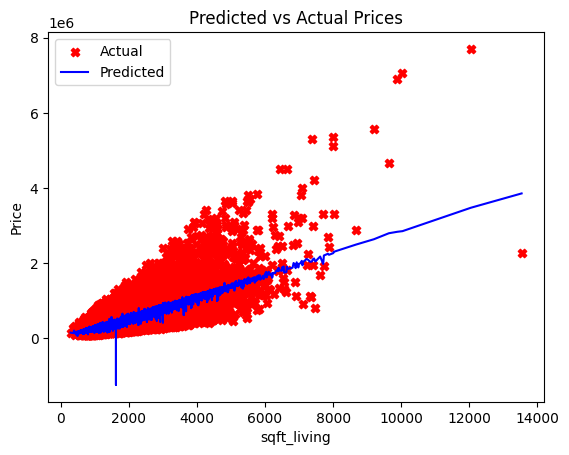

In [11]:
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
x_norm = (x_train - x_mean) / x_std

y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_norm = (y_train - y_mean) / y_std

w_init = np.zeros((x_norm.shape[1], 1))
b_init = 0.01
alpha = 0.01
iter = 1000

w_final,b_final,J_hist = gradient_descent(x_norm,y_norm,w_init,b_init,compute_cost,compute_gradient,alpha,iter)
y_pred_norm = np.dot(x_norm, w_final) + b_final
y_pred = y_pred_norm * y_std + y_mean   # denormalize
y_true = y_train.flatten()              # actual prices

# Plot
sort_idx = np.argsort(x_train[:, 0])
plt.scatter(x_train[sort_idx, 0], y_true[sort_idx], marker='X', color='red', label="Actual")
plt.plot(x_train[sort_idx, 0], y_pred[sort_idx], color='blue', label="Predicted")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Predicted vs Actual Prices")
plt.legend()
plt.show()

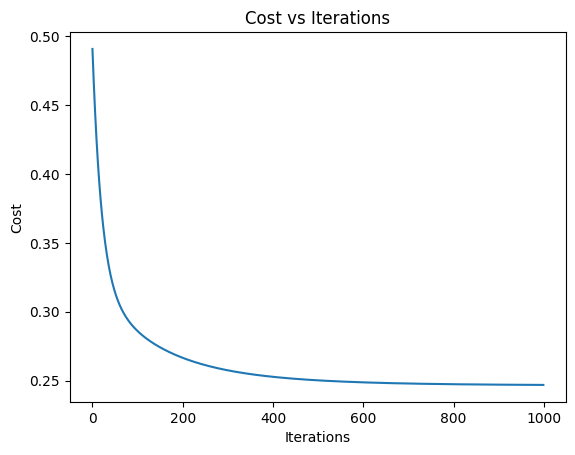

In [12]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()
